In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("cars.csv")  


In [3]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
df.fillna(df.median(numeric_only=True), inplace=True)

df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [6]:
# labels object(text) to numeric 


encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,14,1743,2013,1883,1,581,16,29,14,0,0,7
1,19,1182,2021,1464,2,566,32,185,71,0,0,820
2,27,1325,2022,1043,2,541,40,38,14,1,1,1164
3,20,1242,2015,2617,3,724,23,29,14,1,0,208
4,3,1225,2021,2662,2,200,32,120,14,1,1,748
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,5,484,2023,2323,2,1060,33,50,75,1,0,749
4005,3,1464,2022,79,2,714,59,29,14,1,0,1156
4006,43,1677,2022,913,7,1133,40,29,14,1,1,1528
4007,14,666,2020,1422,2,917,38,38,14,1,0,1274


In [7]:
X = df.drop(columns=['price'])
Y = df['price']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


###### Implementing Decision Tree

In [9]:

dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, Y_train)
Y_pred_dt = dt_model.predict(X_test)


###### Implementing Random Forest

In [10]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)


In [11]:
# Evaluate Models

mse_dt = mean_squared_error(Y_test, Y_pred_dt)
r2_dt = r2_score(Y_test, Y_pred_dt)

mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

print(f"Decision Tree -> MSE: {mse_dt:}, R² Score: {r2_dt:}")
print(f"Random Forest -> MSE: {mse_rf:}, R² Score: {r2_rf:}")


Decision Tree -> MSE: 156042.46108165118, R² Score: 0.19470778362551955
Random Forest -> MSE: 144604.62040822525, R² Score: 0.25373533293866257


Text(0.5, 1.0, ' Accuracy for Decision Tree vs. Random Forest')

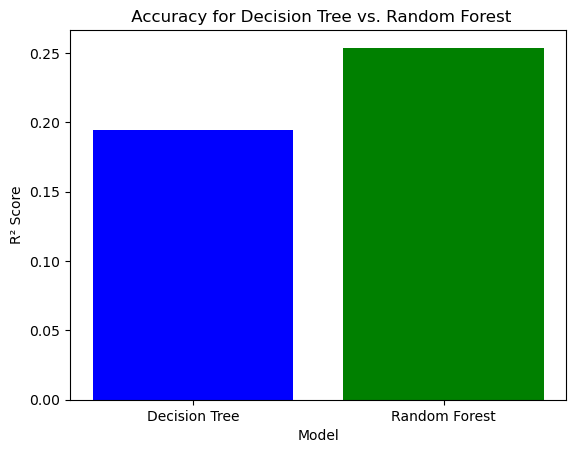

In [13]:

# Comparing both Model through graph

plt.bar(["Decision Tree", "Random Forest"], [r2_dt, r2_rf], color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title(" Accuracy for Decision Tree vs. Random Forest")
